In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
os.path.exists("Project/tests/test_1/generate_trajectory.json")

True

In [3]:
f = open("Project/tests/test_4/generate_trajectory.json")
data = json.load(f)

In [4]:
spirals = [np.array([[d["x"], d["y"]] for d in data["spirals"][i]]) for i in range(len(data["spirals"]))]

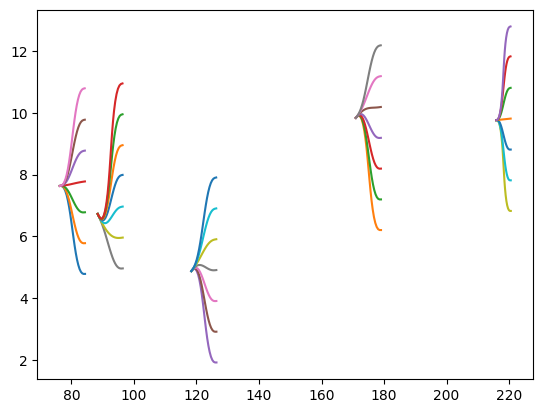

In [5]:
for i in range(5):
    f = open(f"Project/tests/test_{i}/generate_trajectory.json")
    data = json.load(f)
    spirals = [np.array([[d["x"], d["y"]] for d in data["spirals"][j]]) for j in range(len(data["spirals"]))]
    for spiral in spirals:
        plt.plot(spiral[:, 0], spiral[:, 1])

In [6]:
from Project.planners.VelocityProfileGenerator import VelocityProfileGenerator
from Project.planners.Structures import State, PathPoint, Maneuver, TrajectoryPoint
from Project.tests import TestParams as p

In [7]:
velocity_profile_generator = VelocityProfileGenerator()
velocity_profile_generator.setup(p.P_TIME_GAP, p.P_MAX_ACCEL, p.P_SLOW_SPEED)

In [8]:
def parse_trajectory_from_file(path):
    data = None

    with open(path) as file:
        data = json.load(file)

    spirals = []
    for s in data["spirals"]:
        spiral = []
        for point in s:
            path_point = PathPoint(**point)
            spiral.append(path_point)
        spirals.append(spiral)

    trajectories = []

    for t in data["result"]:
        trajectory = []
        for point in t:
            trajec_point = TrajectoryPoint.from_dict(point)
            trajectory.append(trajec_point)
        trajectories.append(trajectory)

    desired_speed = data["desired_speed"]
    ego_state = State.from_dict(data["ego_state"])
    behaviour = Maneuver(data["behaviour"])

    return spirals, desired_speed, ego_state, behaviour, trajectories

In [9]:
spirals, desired_speed, ego_state, behaviour, trajectories = parse_trajectory_from_file("Project/tests/test_4/generate_trajectory.json")
print(behaviour)
calculated_trajectories = []
for i, (spiral, trajectory) in enumerate(zip(spirals, trajectories)):
    print(f"\tTrajectory {i}", end = " ")
    trajectory_calculated = velocity_profile_generator.generate_trajectory(
        spiral,
        desired_speed,
        ego_state,
        None,
        behaviour
    )
    calculated_trajectories.append(trajectory_calculated)

Maneuver.DECEL_TO_STOP
	Trajectory 0 Decel distance: -0.0 from 1.0 to 1.0 with 1.5 acceleration
Brake distance: 0.3333333333333333 from 1.0 to 0 with 1.5 acceleration
Brake index: 18 temp_dist: 0.5910397900756734
Brake index: 20 temp_dist: 0
Brake index: 17 temp_dist: 0.5907184185766617
Decel index: 1 temp_dist: 0.2956807461306405
Decel index: 0 temp_dist: 0.0
	Trajectory 1 Decel distance: -0.0 from 1.0 to 1.0 with 1.5 acceleration
Brake distance: 0.3333333333333333 from 1.0 to 0 with 1.5 acceleration
Brake index: 18 temp_dist: 0.5213677251383961
Brake index: 20 temp_dist: 0
Brake index: 17 temp_dist: 0.521223418274855
Decel index: 1 temp_dist: 0.26075611999904913
Decel index: 0 temp_dist: 0.0
	Trajectory 2 Decel distance: -0.0 from 1.0 to 1.0 with 1.5 acceleration
Brake distance: 0.3333333333333333 from 1.0 to 0 with 1.5 acceleration
Brake index: 18 temp_dist: 0.4764497776287399
Brake index: 20 temp_dist: 0
Brake index: 17 temp_dist: 0.4764131552893802
Decel index: 1 temp_dist: 0.2382

In [10]:
def plot_trajectory(trajectory, color = "b", alpha = 1.0):
    x = [point.path_point.x for point in trajectory]
    y = [point.path_point.y for point in trajectory]
    plt.plot(x, y, color, alpha = alpha)

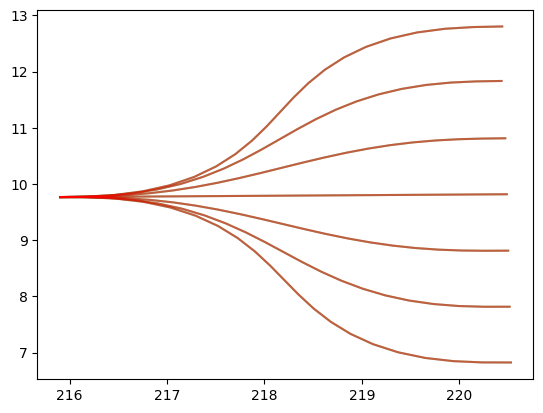

In [11]:
plt.figure()

for trajectory in calculated_trajectories:
    plot_trajectory(trajectory, "g", 0.5)

for trajectory in trajectories:
    plot_trajectory(trajectory, "r", 0.5)

In [12]:
import pandas as pd

In [13]:
def get_trajectory_df(traj):
    df = pd.DataFrame(columns = traj[0].to_dict().keys())

    for i in range(0, len(traj)):
        df.loc[len(df)] = list(traj[i].to_dict().values())

    return df

In [14]:
for idx in range(len(trajectories)):
    if ((get_trajectory_df(calculated_trajectories[idx]) - get_trajectory_df(trajectories[idx])).max().any() > 1e-3):
        print(f"Trajectory {idx} is different")
    display(get_trajectory_df(trajectories[idx]))
    display(get_trajectory_df(calculated_trajectories[idx]))



,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.909160,9.767245,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.175263,9.764982,0.0,-0.027987,-0.249661,0.295737,-0.705897,0.0,1.000000,0.0,3.382026
2,216.469715,9.741835,0.0,-0.128910,-0.420442,0.591474,-0.453994,0.0,1.000000,0.0,6.767720
3,216.758877,9.683420,0.0,-0.269755,-0.521109,0.887211,-0.231734,0.0,1.000000,0.0,10.157506
4,217.035739,9.582226,0.0,-0.431085,-0.560429,1.182948,-0.039118,0.0,1.000000,0.0,13.549921
5,217.292449,9.437428,0.0,-0.596051,-0.547168,1.478684,0.123855,0.0,1.000000,0.0,16.942841
6,217.522972,9.253582,0.0,-0.750401,-0.490094,1.774421,0.257183,0.0,1.000000,0.0,20.334320
7,217.725058,9.038545,0.0,-0.882474,-0.397974,2.070158,0.360868,0.0,1.000000,0.0,23.723090
8,217.900962,8.801277,0.0,-0.983202,-0.279573,2.365895,0.434910,0.0,1.000000,0.0,27.108767
9,218.057009,8.550232,0.0,-1.046108,-0.143658,2.661632,0.479307,0.0,1.000000,0.0,30.491824


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.909160,9.767245,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.175263,9.764982,0.0,-0.027987,-0.249661,0.295737,-0.705897,0.0,1.000000,0.0,3.382026
2,216.469715,9.741835,0.0,-0.128910,-0.420442,0.591474,-0.453994,0.0,1.000000,0.0,6.767720
3,216.758877,9.683420,0.0,-0.269755,-0.521109,0.887211,-0.231734,0.0,1.000000,0.0,10.157506
4,217.035739,9.582226,0.0,-0.431085,-0.560429,1.182948,-0.039118,0.0,1.000000,0.0,13.549921
5,217.292449,9.437428,0.0,-0.596051,-0.547168,1.478684,0.123855,0.0,1.000000,0.0,16.942841
6,217.522972,9.253582,0.0,-0.750401,-0.490094,1.774421,0.257183,0.0,1.000000,0.0,20.334320
7,217.725058,9.038545,0.0,-0.882474,-0.397974,2.070158,0.360868,0.0,1.000000,0.0,23.723090
8,217.900962,8.801277,0.0,-0.983202,-0.279573,2.365895,0.434910,0.0,1.000000,0.0,27.108767
9,218.057009,8.550232,0.0,-1.046108,-0.143658,2.661632,0.479307,0.0,1.000000,0.0,30.491824


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.905668,9.767420,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.140348,9.766737,0.0,-0.016807,-2.018977e-01,0.260781,-0.647341,0.0,1.000000,0.0,3.835001
2,216.400597,9.752985,0.0,-0.088774,-3.399927e-01,0.521563,-0.416278,0.0,1.000000,0.0,7.672116
3,216.658538,9.716902,0.0,-0.189205,-4.213768e-01,0.782344,-0.212410,0.0,1.000000,0.0,11.511587
4,216.911005,9.653318,0.0,-0.304235,-4.531416e-01,1.043125,-0.035735,0.0,1.000000,0.0,15.352569
5,217.154367,9.560869,0.0,-0.421849,-4.423789e-01,1.303906,0.113745,0.0,1.000000,0.0,19.193840
6,217.385704,9.441353,0.0,-0.531883,-3.961804e-01,1.564688,0.236031,0.0,1.000000,0.0,23.034281
7,217.603746,9.298825,0.0,-0.626018,-3.216378e-01,1.825469,0.331123,0.0,1.000000,0.0,26.873164
8,217.809324,9.138647,0.0,-0.697790,-2.258429e-01,2.086250,0.399021,0.0,1.000000,0.0,30.710265
9,218.005300,8.966699,0.0,-0.742579,-1.158872e-01,2.347032,0.439725,0.0,1.000000,0.0,34.545858


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.905668,9.767420,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.140348,9.766737,0.0,-0.016807,-2.018977e-01,0.260781,-0.647341,0.0,1.000000,0.0,3.835001
2,216.400597,9.752985,0.0,-0.088774,-3.399927e-01,0.521563,-0.416278,0.0,1.000000,0.0,7.672116
3,216.658538,9.716902,0.0,-0.189205,-4.213768e-01,0.782344,-0.212410,0.0,1.000000,0.0,11.511587
4,216.911005,9.653318,0.0,-0.304235,-4.531416e-01,1.043125,-0.035735,0.0,1.000000,0.0,15.352569
5,217.154367,9.560869,0.0,-0.421849,-4.423789e-01,1.303906,0.113745,0.0,1.000000,0.0,19.193840
6,217.385704,9.441353,0.0,-0.531883,-3.961804e-01,1.564688,0.236031,0.0,1.000000,0.0,23.034281
7,217.603746,9.298825,0.0,-0.626018,-3.216378e-01,1.825469,0.331123,0.0,1.000000,0.0,26.873164
8,217.809324,9.138647,0.0,-0.697790,-2.258429e-01,2.086250,0.399021,0.0,1.000000,0.0,30.710265
9,218.005300,8.966699,0.0,-0.742579,-1.158872e-01,2.347032,0.439725,0.0,1.000000,0.0,34.545858


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.903417,9.767584,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.117835,9.768371,0.0,-0.003634,-1.162354e-01,0.238250,-0.407877,0.0,1.000000,0.0,4.197391
2,216.355981,9.762998,0.0,-0.041485,-1.957151e-01,0.476499,-0.262179,0.0,1.000000,0.0,8.395421
3,216.593599,9.746841,0.0,-0.094298,-2.425259e-01,0.714749,-0.133635,0.0,1.000000,0.0,12.594163
4,216.829895,9.717260,0.0,-0.154778,-2.607544e-01,0.952998,-0.022244,0.0,1.000000,0.0,16.793362
5,217.063937,9.673294,0.0,-0.216602,-2.544874e-01,1.191248,0.071994,0.0,1.000000,0.0,20.992647
6,217.294946,9.615411,0.0,-0.274420,-2.278116e-01,1.429498,0.149079,0.0,1.000000,0.0,25.191680
7,217.522545,9.545221,0.0,-0.323858,-1.848138e-01,1.667747,0.209010,0.0,1.000000,0.0,29.390241
8,217.746902,9.465179,0.0,-0.361512,-1.295807e-01,1.905997,0.251789,0.0,1.000000,0.0,33.588264
9,217.968734,9.378313,0.0,-0.384956,-6.619898e-02,2.144247,0.277414,0.0,1.000000,0.0,37.785831


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.903417,9.767584,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.117835,9.768371,0.0,-0.003634,-1.162354e-01,0.238250,-0.407877,0.0,1.000000,0.0,4.197391
2,216.355981,9.762998,0.0,-0.041485,-1.957151e-01,0.476499,-0.262179,0.0,1.000000,0.0,8.395421
3,216.593599,9.746841,0.0,-0.094298,-2.425259e-01,0.714749,-0.133635,0.0,1.000000,0.0,12.594163
4,216.829895,9.717260,0.0,-0.154778,-2.607544e-01,0.952998,-0.022244,0.0,1.000000,0.0,16.793362
5,217.063937,9.673294,0.0,-0.216602,-2.544874e-01,1.191248,0.071994,0.0,1.000000,0.0,20.992647
6,217.294946,9.615411,0.0,-0.274420,-2.278116e-01,1.429498,0.149079,0.0,1.000000,0.0,25.191680
7,217.522545,9.545221,0.0,-0.323858,-1.848138e-01,1.667747,0.209010,0.0,1.000000,0.0,29.390241
8,217.746902,9.465179,0.0,-0.361512,-1.295807e-01,1.905997,0.251789,0.0,1.000000,0.0,33.588264
9,217.968734,9.378313,0.0,-0.384956,-6.619898e-02,2.144247,0.277414,0.0,1.000000,0.0,37.785831


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.902621,9.767749,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000
1,216.109879,9.770025,0.0,0.010982,0.0,0.230300,0.0,0.0,1.000000,0.0,4.342167
2,216.340165,9.772554,0.0,0.010982,0.0,0.460599,0.0,0.0,1.000000,0.0,8.684334
3,216.570450,9.775084,0.0,0.010982,0.0,0.690899,0.0,0.0,1.000000,0.0,13.026502
4,216.800736,9.777613,0.0,0.010982,0.0,0.921199,0.0,0.0,1.000000,0.0,17.368669
5,217.031022,9.780142,0.0,0.010982,0.0,1.151499,0.0,0.0,1.000000,0.0,21.710836
6,217.261308,9.782671,0.0,0.010982,0.0,1.381798,0.0,0.0,1.000000,0.0,26.053003
7,217.491594,9.785200,0.0,0.010982,0.0,1.612098,0.0,0.0,1.000000,0.0,30.395171
8,217.721880,9.787730,0.0,0.010982,0.0,1.842398,0.0,0.0,1.000000,0.0,34.737338
9,217.952166,9.790259,0.0,0.010982,0.0,2.072698,0.0,0.0,1.000000,0.0,39.079505


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.902621,9.767749,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000
1,216.109879,9.770025,0.0,0.010982,0.0,0.230300,0.0,0.0,1.000000,0.0,4.342167
2,216.340165,9.772554,0.0,0.010982,0.0,0.460599,0.0,0.0,1.000000,0.0,8.684334
3,216.570450,9.775084,0.0,0.010982,0.0,0.690899,0.0,0.0,1.000000,0.0,13.026502
4,216.800736,9.777613,0.0,0.010982,0.0,0.921199,0.0,0.0,1.000000,0.0,17.368669
5,217.031022,9.780142,0.0,0.010982,0.0,1.151499,0.0,0.0,1.000000,0.0,21.710836
6,217.261308,9.782671,0.0,0.010982,0.0,1.381798,0.0,0.0,1.000000,0.0,26.053003
7,217.491594,9.785200,0.0,0.010982,0.0,1.612098,0.0,0.0,1.000000,0.0,30.395171
8,217.721880,9.787730,0.0,0.010982,0.0,1.842398,0.0,0.0,1.000000,0.0,34.737338
9,217.952166,9.790259,0.0,0.010982,0.0,2.072698,0.0,0.0,1.000000,0.0,39.079505


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.903355,9.767927,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.117212,9.771808,0.0,0.025305,1.141925e-01,0.237664,0.401914,0.0,1.000000,0.0,4.207721
2,216.354607,9.782226,0.0,0.062409,1.923741e-01,0.475329,0.258806,0.0,1.000000,0.0,8.416059
3,216.591266,9.803180,0.0,0.114210,2.385433e-01,0.712993,0.132522,0.0,1.000000,0.0,12.625084
4,216.826371,9.837245,0.0,0.173576,2.566985e-01,0.950658,0.023062,0.0,1.000000,0.0,16.834552
5,217.059002,9.885359,0.0,0.234323,2.508380e-01,1.188322,-0.069575,0.0,1.000000,0.0,21.044107
6,217.288415,9.947069,0.0,0.291221,2.249605e-01,1.425987,-0.145387,0.0,1.000000,0.0,25.253423
7,217.514274,10.020816,0.0,0.339985,1.830642e-01,1.663651,-0.204376,0.0,1.000000,0.0,29.462288
8,217.736779,10.104220,0.0,0.377284,1.291477e-01,1.901315,-0.246540,0.0,1.000000,0.0,33.670633
9,217.956671,10.194354,0.0,0.400737,6.720938e-02,2.138980,-0.271881,0.0,1.000000,0.0,37.878536


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.903355,9.767927,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.117212,9.771808,0.0,0.025305,1.141925e-01,0.237664,0.401914,0.0,1.000000,0.0,4.207721
2,216.354607,9.782226,0.0,0.062409,1.923741e-01,0.475329,0.258806,0.0,1.000000,0.0,8.416059
3,216.591266,9.803180,0.0,0.114210,2.385433e-01,0.712993,0.132522,0.0,1.000000,0.0,12.625084
4,216.826371,9.837245,0.0,0.173576,2.566985e-01,0.950658,0.023062,0.0,1.000000,0.0,16.834552
5,217.059002,9.885359,0.0,0.234323,2.508380e-01,1.188322,-0.069575,0.0,1.000000,0.0,21.044107
6,217.288415,9.947069,0.0,0.291221,2.249605e-01,1.425987,-0.145387,0.0,1.000000,0.0,25.253423
7,217.514274,10.020816,0.0,0.339985,1.830642e-01,1.663651,-0.204376,0.0,1.000000,0.0,29.462288
8,217.736779,10.104220,0.0,0.377284,1.291477e-01,1.901315,-0.246540,0.0,1.000000,0.0,33.670633
9,217.956671,10.194354,0.0,0.400737,6.720938e-02,2.138980,-0.271881,0.0,1.000000,0.0,37.878536


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.905515,9.768143,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.00000,0.0,0.000000
1,216.138813,9.773969,0.0,0.038952,2.043657e-01,0.259326,0.659116,0.0,1.00000,0.0,3.856521
2,216.397237,9.793434,0.0,0.111402,3.442403e-01,0.518653,0.424241,0.0,1.00000,0.0,7.715197
3,216.652842,9.835200,0.0,0.212538,4.267872e-01,0.777979,0.216988,0.0,1.00000,0.0,11.576277
4,216.902321,9.904374,0.0,0.328420,4.591693e-01,1.037306,0.037356,0.0,1.00000,0.0,15.438903
5,217.141979,10.002242,0.0,0.446970,4.485499e-01,1.296632,-0.114653,0.0,1.00000,0.0,19.301831
6,217.368902,10.126938,0.0,0.557964,4.020920e-01,1.555958,-0.239040,0.0,1.00000,0.0,23.163921
7,217.581884,10.274373,0.0,0.653038,3.269588e-01,1.815285,-0.335805,0.0,1.00000,0.0,27.024426
8,217.781862,10.439207,0.0,0.725683,2.303134e-01,2.074611,-0.404948,0.0,1.00000,0.0,30.883116
9,217.971830,10.615637,0.0,0.771250,1.193190e-01,2.333938,-0.446469,0.0,1.00000,0.0,34.740261


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.905515,9.768143,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.00000,0.0,0.000000
1,216.138813,9.773969,0.0,0.038952,2.043657e-01,0.259326,0.659116,0.0,1.00000,0.0,3.856521
2,216.397237,9.793434,0.0,0.111402,3.442403e-01,0.518653,0.424241,0.0,1.00000,0.0,7.715197
3,216.652842,9.835200,0.0,0.212538,4.267872e-01,0.777979,0.216988,0.0,1.00000,0.0,11.576277
4,216.902321,9.904374,0.0,0.328420,4.591693e-01,1.037306,0.037356,0.0,1.00000,0.0,15.438903
5,217.141979,10.002242,0.0,0.446970,4.485499e-01,1.296632,-0.114653,0.0,1.00000,0.0,19.301831
6,217.368902,10.126938,0.0,0.557964,4.020920e-01,1.555958,-0.239040,0.0,1.00000,0.0,23.163921
7,217.581884,10.274373,0.0,0.653038,3.269588e-01,1.815285,-0.335805,0.0,1.00000,0.0,27.024426
8,217.781862,10.439207,0.0,0.725683,2.303134e-01,2.074611,-0.404948,0.0,1.00000,0.0,30.883116
9,217.971830,10.615637,0.0,0.771250,1.193190e-01,2.333938,-0.446469,0.0,1.00000,0.0,34.740261


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.908997,9.768390,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.173631,9.776438,0.0,0.049821,2.501129e-01,0.294230,0.710941,0.0,1.000000,0.0,3.399345
2,216.466017,9.805810,0.0,0.150421,4.212831e-01,0.588460,0.457540,0.0,1.000000,0.0,6.802354
3,216.752407,9.870043,0.0,0.290846,5.222798e-01,0.882689,0.233943,0.0,1.000000,0.0,10.209453
4,217.025701,9.976451,0.0,0.451739,5.618721e-01,1.176919,0.040150,0.0,1.000000,0.0,13.619185
5,217.278106,10.125709,0.0,0.616323,5.488292e-01,1.471149,-0.123840,0.0,1.000000,0.0,17.029430
6,217.503727,10.313201,0.0,0.770401,4.919204e-01,1.765379,-0.258026,0.0,1.000000,0.0,20.438245
7,217.700478,10.531110,0.0,0.902356,3.999147e-01,2.059608,-0.362408,0.0,1.000000,0.0,23.844361
8,217.870750,10.770607,0.0,1.003152,2.815813e-01,2.353838,-0.436986,0.0,1.000000,0.0,27.247386
9,218.020952,11.023439,0.0,1.066333,1.456894e-01,2.648068,-0.481760,0.0,1.000000,0.0,30.647787


,x,y,z,theta,kappa,s,dkappa,ddkappa,v,a,relative_time
0,215.908997,9.768390,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.0,1.000000,0.0,0.000000
1,216.173631,9.776438,0.0,0.049821,2.501129e-01,0.294230,0.710941,0.0,1.000000,0.0,3.399345
2,216.466017,9.805810,0.0,0.150421,4.212831e-01,0.588460,0.457540,0.0,1.000000,0.0,6.802354
3,216.752407,9.870043,0.0,0.290846,5.222798e-01,0.882689,0.233943,0.0,1.000000,0.0,10.209453
4,217.025701,9.976451,0.0,0.451739,5.618721e-01,1.176919,0.040150,0.0,1.000000,0.0,13.619185
5,217.278106,10.125709,0.0,0.616323,5.488292e-01,1.471149,-0.123840,0.0,1.000000,0.0,17.029430
6,217.503727,10.313201,0.0,0.770401,4.919204e-01,1.765379,-0.258026,0.0,1.000000,0.0,20.438245
7,217.700478,10.531110,0.0,0.902356,3.999147e-01,2.059608,-0.362408,0.0,1.000000,0.0,23.844361
8,217.870750,10.770607,0.0,1.003152,2.815813e-01,2.353838,-0.436986,0.0,1.000000,0.0,27.247386
9,218.020952,11.023439,0.0,1.066333,1.456894e-01,2.648068,-0.481760,0.0,1.000000,0.0,30.647787


In [15]:
print(len)

<built-in function len>


In [16]:
i = 1

if i == 1:
    print("1")
    i = 2
elif i == 2:
    print("2")

1
